TEMPERATURE PREDICTION USING ARIMA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/dataexport_20220728T153013.csv')

In [3]:
df.head(10)

,location,Basel
0,lat,47.54694
1,lon,7.56892
2,asl,283.697
3,variable,Temperature
4,unit,°F
5,level,2 m elevation corrected
6,resolution,hourly
7,aggregation,None
8,timestamp,Basel Temperature [2 m elevation corrected]
9,20220101T0000,49.47895


In [4]:
newdf=df.drop(df.index[[0,1,2,3,4,5,6,7,8]])

In [5]:
newdf.columns=['Timestamp','Hourly temp']

In [6]:
newdf=newdf.reset_index()

In [7]:
newdf.drop('index',inplace=True,axis=1)

In [8]:
newdf.head()

,Timestamp,Hourly temp
0,20220101T0000,49.47895
1,20220101T0100,48.542953
2,20220101T0200,48.308952
3,20220101T0300,48.02095
4,20220101T0400,47.732952


In [9]:
newdf['Timestamp']= pd.to_datetime(newdf['Timestamp'])

In [10]:
newdf['Hourly temp']=newdf['Hourly temp'].astype(float)

In [11]:
mean=np.mean(newdf['Hourly temp'])
mean

53.18604773641805

{'boxes': [<matplotlib.lines.Line2D at 0x7fe02f7e0a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe02f7e9a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe02f7f1a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe02f7f1550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe02f7e0f90>,
  <matplotlib.lines.Line2D at 0x7fe02f7e9510>]}

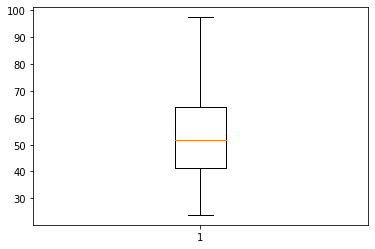

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(newdf['Hourly temp'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe0238c4a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe0238caad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0238d2b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0238d25d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe0238ca050>,
  <matplotlib.lines.Line2D at 0x7fe0238ca590>]}

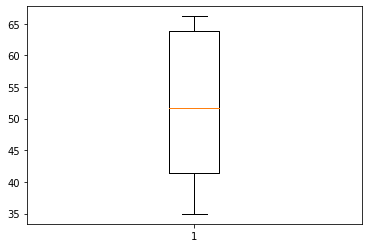

In [13]:
#Winzorization to reduce the effect of outliers
from scipy.stats.mstats import winsorize
newdf['Hourly temp']=winsorize(newdf['Hourly temp'], limits=[0.1, 0.2])
mean_post=np.mean(newdf['Hourly temp'])
plt.boxplot(newdf['Hourly temp'])

In [20]:
#ADF Test to check id data is stationary or not
series=newdf['Hourly temp']
from statsmodels.tsa.stattools import adfuller
result = adfuller(series)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -2.4758405517229822
p-value: 0.1214637761484581
Critical Values:
	1%: -3.4318653292515395
	5%: -2.8622095883960235
	10%: -2.567126426709739


In [14]:
! pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(newdf['Hourly temp'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13364.216, Time=19.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16717.780, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13859.335, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14678.018, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16715.787, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13830.510, Time=2.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13382.748, Time=5.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13385.670, Time=6.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13294.542, Time=9.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13824.745, Time=1.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13367.783, Time=9.99 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13072.468, Time=11.59 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13813.179, Time=3.16 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=13138.594, Time=13.17 sec
 ARIMA(2,1,5)(0,

In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    4344 non-null   datetime64[ns]
 1   Hourly temp  4344 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 68.0 KB


In [17]:
#train test split
print(newdf.shape)
train=newdf.iloc[0:1448]
test=newdf.iloc[1448:2896]
print(train.shape,test.shape)

(4344, 2)
(1448, 2) (1448, 2)


In [18]:
#fitting data to model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Hourly temp'],order=(2,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Hourly temp   No. Observations:                 1448
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -2187.347
Date:                Sun, 31 Jul 2022   AIC                           4390.693
Time:                        07:35:36   BIC                           4432.911
Sample:                             0   HQIC                          4406.449
                               - 1448                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5472      0.064     24.334      0.000       1.423       1.672
ar.L2         -0.6593      0.057    -11.603      0.000      -0.771      -0.548
ma.L1         -1.0126      0.067    -15.109      0.000      -1.144      -0.881
ma.L2          0.1066      0.036      2.944      0.003       0.036       0.178
ma.L3          0.0490      0.037      1.338      0.181      -0.023       0.121
ma.L4          0.0165      0.039      0.422      0.673      -0.060       0.093
ma.L5         -0.1104      0.039     -2.838      0.005      -0.187      -0.034
sigma2         1.2025      0.025     49.066      0.000       1.154       1.251
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1784.74
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.34
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

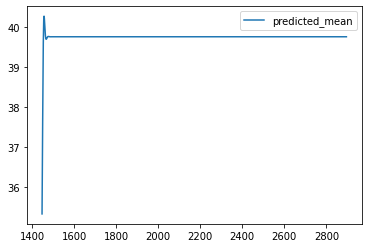

In [20]:
#plotting prediction
import matplotlib.pyplot as plt
from datetime import datetime
start=len(test)
end=len(test)+len(train)-1
pred=model.predict(start=start, end=end)
pred.plot(legend=True)

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Mean of test set",test['Hourly temp'].mean())
rmse=sqrt(mean_squared_error(pred,test['Hourly temp']))
print("RMSE:",rmse)

Mean of test set 50.580506248618775
RMSE: 14.181020489489825


In [ ]:
# from datetime import datetime
# start_index = datetime(2022, 1 ,1)
# end_index = datetime(2022, 6, 30)
